<a href="https://colab.research.google.com/github/urnotirisfeng/Visualisation-de-donn-es/blob/main/Visualisation_TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TD1

---

# EX1 :
1.   使用 Scikit-learn 提供的聚类算法对不同的数据集进行处理
2.   使用 Scikit-learn 提供的降维算法对不同的数据集进行处理


---





调用 load_digits() 时，会返回一个类似字典的对象

属性名

*   images ：原始图像数据，形状为 (n_samples, 8, 8)，也就是每个图像是 8x8 像素
*   data：展平后的图像数据，每张图变成了一个 64 维的向量（8×8=64），形状为 (n_samples, 64)
* target	每张图的真实标签（也就是这个手写数字实际代表的是几））
* target_names	标签的含义（0 到 9）

---



In [ ]:
# 使用 sklearn 中的 load_digits 函数加载数据集，并显示其形状（shape）
from sklearn.datasets import load_digits

# 加载数据
digits = load_digits()

# 显示数据形状
print("Images.shape:", digits.images.shape)
print("Data.shape :", digits.data.shape)
print("Target.shape:", digits.target.shape)

Images.shape: (1797, 8, 8)
Data.shape : (1797, 64)
Target.shape: (1797,)


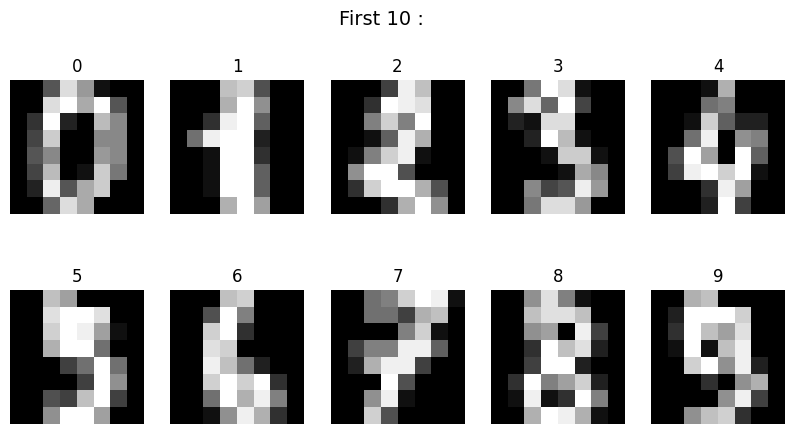

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for index in range(10): # 循环前十张图像
    plt.subplot(2, 5, index + 1)  # 意思是把整张图分成 1 行 10 列，然后我们当前画的是第 index+1 个位置的图

    plt.imshow(digits.images[index], cmap="gray", interpolation='nearest')
    # digits.images[index] 是第 index 张图的 8x8 像素矩阵
    # cmap=plt.cm.gray_r 使用灰度反转的配色方案（白底黑字） // or = gray 变成黑底白字
    # interpolation='nearest' 表示图像放大时使用最近邻插值，图像边缘更清晰

    plt.title(str(digits.target[index]))  # 设置标题为对应数字
    plt.axis('off')  # 不显示坐标轴

plt.suptitle("First 10 : ", fontsize=14)
plt.show()


3：使用课程中讲过的某种聚类算法（例如 KMeans），对数据集进行聚类。在这个问题中应该使用多少个簇（cluster）？
*  在**聚类（Clustering）**算法中，簇是指：一组在特征上彼此相似的数据点的集合
*   我们不告诉算法图片上的数字是什么（不使用标签），然后看它能不能自动分出不同的类别（聚类）




本题借助“灰度”来进行分类预测：

灰度（Grayscale）就是黑白图像中，每个像素点的亮度值。

最黑的地方是：黑色（灰度 = 0）

最亮的地方是：白色（灰度 = 最大值，通常是 255 或 16）

中间的灰色区域：灰度值在 0 和最大值之间

每张图被看作一个64维的点，KMeans在聚类时，会比较这些 64 维向量之间的距离。
比如：
图像 A = [0, 0, 0, 10, 15, ...]
图像 B = [0, 0, 1, 11, 14, ...]
由于它们的像素灰度分布很接近，那么它们之间的距离很小，KMeans 就会把它们聚在一起。

---



In [ ]:
# import KMeans
from sklearn.cluster import KMeans

# 分成10簇
n_clusters = 10

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(digits.data)  # 训练模型

# 预测每个图像属于哪个簇
predicted_labels = kmeans.labels_

# 打印前20个图像的预测簇编号（不是数字标签，只是簇的编号）
print("First 10 images predict number：")
print(predicted_labels[:10])

First 10 images predict number：
[5 7 7 6 4 9 2 0 8 9]



---
4：显示一些图像样本及其聚类后预测的标签。

---



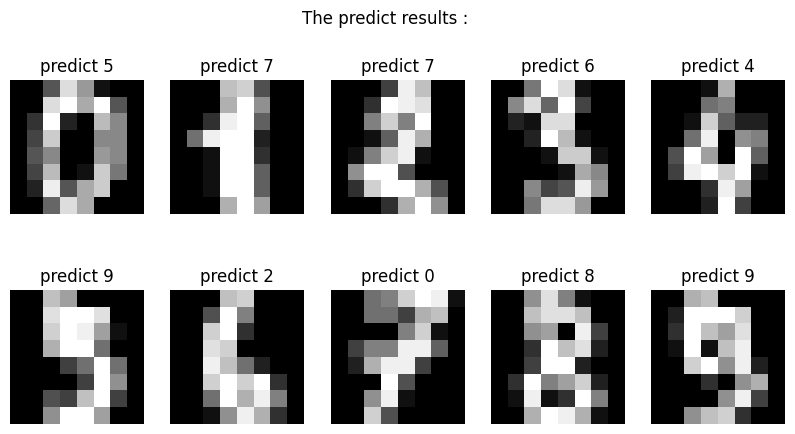

In [ ]:
# 加载数据
digits = load_digits()
X = digits.data
y_true = digits.target

# 使用上面训练的模型
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X)  # 得到预测的簇标签（不是实际数字）

# 显示前10张预测得图像，及其预测的聚类编号
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')  # 将64维向量还原为8x8图像
    ax.set_title(f"predict {y_pred[i]}")  # 标题为预测标签
    ax.axis('off')  # 不显示坐标轴

plt.suptitle("The predict results :")
plt.show()


---
5/ Afficher les centres des clusters trouvés


---


可视化KMeans聚类中心
在第五步中，我们：

取出 KMeans 聚类中每个簇的中心点
→ 每个中心是一个长度为 64 的向量（因为每张图像是 8×8 = 64 像素点）

把这些中心向量重塑（reshape）成 8x8 的图像矩阵
→ 这样我们就可以像普通图像一样显示它们了

把它们显示出来，一共会显示 10 张图（因为我们设定 n_clusters=10）

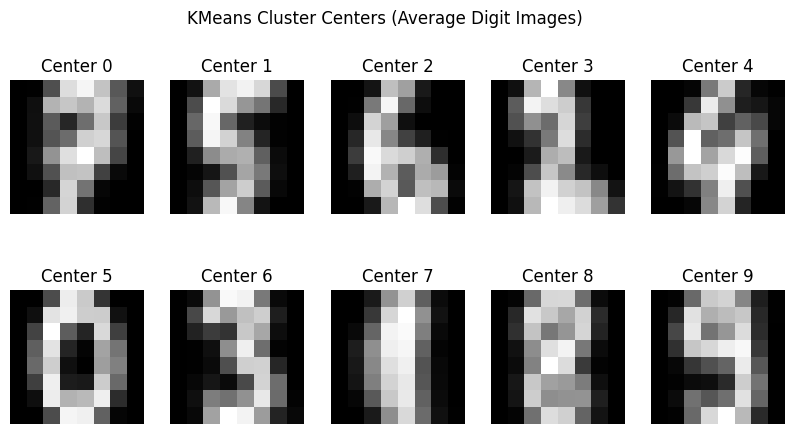

In [ ]:
# Display all 10 cluster center images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    center = kmeans.cluster_centers_[i].reshape(8, 8)  # Each center is a 64-dimensional vector, reshape to 8x8 image
    ax.imshow(center, cmap='gray')
    ax.set_title(f"Center {i}")
    ax.axis('off')

plt.suptitle("KMeans Cluster Centers (Average Digit Images)")
plt.show()


#EX2: Clustering - Recherche du paramètre k optimal
聚类 - 寻找最优的参数 k
--

1.   从练习1的代码出发，编写一个函数用于计算聚类后每个簇的**惯性（inertia）**的平均值

---
什么是惯性？

*   在 KMeans 聚类中，惯性是每个样本到其聚类中心的距离平方和，代表了聚类的紧密程度。

*   惯性越小，表示样本距离中心越近，聚类效果越好

In [26]:
# 导入 KMeans 聚类算法模块
from sklearn.cluster import KMeans

# 导入 NumPy 数值计算库（虽然在函数中未直接用到，但在实际使用中通常会配合使用）
import numpy as np

# 定义一个函数，用于计算不同聚类数量下的惯性（Inertia）值
def calculer_inerties(data, k_range):
    # 创建一个空列表，用于存储每个聚类数对应的惯性值
    inertias = []

    # 遍历所有给定的聚类数量（例如 k=1 到 k=10）
    for k in k_range:
        # 创建并拟合 KMeans 模型
        # n_clusters=k：指定当前的聚类数量
        # random_state=0：设置随机种子，保证每次结果一致（可复现性）
        # .fit(data)：对输入数据执行聚类操作
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

        # 将当前模型计算得到的惯性值添加到 inertias 列表中
        # inertia_ 是所有样本点到其最近聚类中心的距离的平方和
        inertias.append(kmeans.inertia_)

    # 返回包含所有聚类数量下的惯性值列表
    return inertias


---
2. 将该函数泛化为一段代码：
    1. 横轴表示 KMeans 聚类中使用的簇数量 k
    2. 纵轴表示对应的惯性（inertia）值
    
---

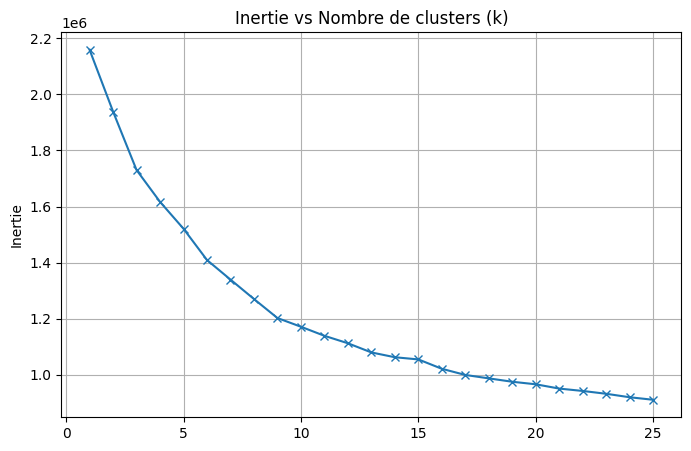

In [27]:
# 导入绘图库 matplotlib，用于数据可视化
import matplotlib.pyplot as plt
# 设置 k 的取值范围，从 1 到 25（不包含 26）
k_range = range(1, 26)
# 调用前面定义的函数 calculer_inerties，计算每个 k 值下的 KMeans 惯性值
# digits.data 通常是 sklearn 中 digits 图像数据集的特征矩阵（64维，每行是一张手写数字图像）
inertias = calculer_inerties(digits.data, k_range)
# 创建一个 8x5 英寸的图像窗口
plt.figure(figsize=(8, 5))
# 画出 k 值和对应的惯性值曲线图，点的标记用 'x' 形状
plt.plot(k_range, inertias, marker='x')
# 设置图表标题
plt.title("Inertie vs Nombre de clusters (k)")
# 设置纵轴标签为惯性值
plt.ylabel("Inertie")
# 显示网格线以便更容易观察趋势
plt.grid(True)
# 展示图形
plt.show()


3. 使用 Distorsion（欧氏平均距离）来寻找最优 k

In [28]:
# 导入 scipy 中的 cdist，用于计算数据点与聚类中心之间的距离
from scipy.spatial.distance import cdist

# 定义一个函数，用于计算不同聚类数下的 distorsion（平均最小距离）
def calculer_distorsions(data, k_range):
    distortions = []  # 用于存储每个k值下的distorsion

    # 遍历每一个候选聚类数 k
    for k in k_range:
        # 创建并训练KMeans模型
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

        # 计算每个数据点到每个聚类中心的欧几里得距离，结果是一个矩阵：
        # 行是样本点，列是聚类中心
        distances = cdist(data, kmeans.cluster_centers_, 'euclidean')

        # 对每一行（每个样本），取它到最近聚类中心的距离
        min_distances = np.min(distances, axis=1)

        # 计算所有点到其最近中心的平均距离（即 Distorsion）
        distortion = np.mean(min_distances)

        # 将该 k 值下的 distortion 添加到列表中
        distortions.append(distortion)

    # 返回所有 k 值对应的 distortion
    return distortions

4. 使用前面开发的算法，对以下数据集进行最优 k 值的查找
  1.   在一个使用 make_blobs 人工生成的聚类数据集
  1.   IRIS 鸢尾花数据集上
  2.   在 Kaggle 上下载的 "Experience and Salary" 数据集上





使用 make_blobs 生成人工数据集

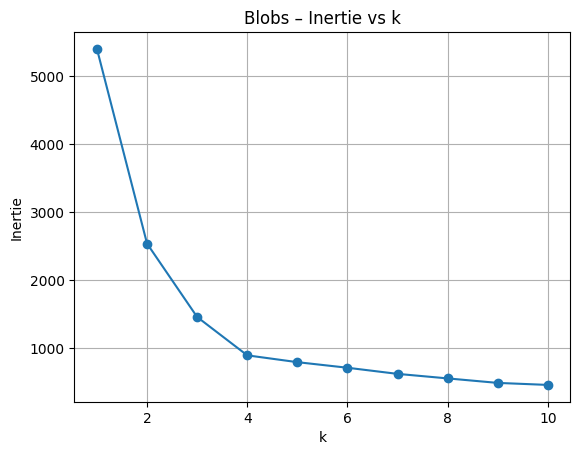

In [29]:
# 从 sklearn.datasets 中导入 make_blobs，用于生成模拟聚类数据
from sklearn.datasets import make_blobs

# 生成 500 个二维样本点，分布在 4 个簇中，每个簇的标准差为 1.0，random_state=0 保证结果可复现
X_blobs, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=0)
# X_blobs 是生成的数据，_ 是对应的标签（此处不使用，因为无监督学习不需要标签）
# 调用之前定义的 calculer_inerties 函数，计算聚类数从 1 到 10 时的惯性值
inertias = calculer_inerties(X_blobs, range(1, 11))
# 绘制聚类数 k 与对应惯性值的变化图
plt.plot(range(1, 11), inertias, marker='o')  # 用圆圈标记点

# 设置图标题
plt.title("Blobs – Inertie vs k")  # 说明这是 blob 模拟数据的惯性图

# 设置横轴标签为聚类数 k
plt.xlabel("k")

# 设置纵轴标签为惯性值（总距离平方和）
plt.ylabel("Inertie")

# 显示网格线，便于观察趋势
plt.grid(True)

# 展示图形
plt.show()

使用 IRIS 数据集

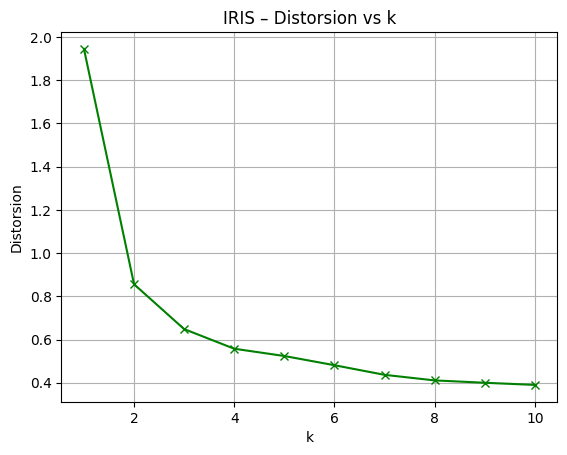

In [30]:
# 导入所需模块
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# 1. 加载 Iris 鸢尾花数据集
iris = load_iris()
X_iris = iris.data  # 提取特征数据（4维：萼片长、萼片宽、花瓣长、花瓣宽）

# 2. 定义函数：根据聚类数量 k 计算 distorsion（平均最小距离）
def calculer_distorsions(data, k_range):
    distortions = []
    for k in k_range:
        # 使用 KMeans 拟合数据
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

        # 计算每个样本点到所有聚类中心的欧式距离（形成 n_samples × k 的距离矩阵）
        distances = cdist(data, kmeans.cluster_centers_, 'euclidean')

        # 对每一行，取距离最近的聚类中心的距离
        min_distances = np.min(distances, axis=1)

        # 计算所有最小距离的平均值，作为当前 k 的 distorsion
        distortion = np.mean(min_distances)

        distortions.append(distortion)  # 存入列表

    return distortions

# 3. 设置聚类数范围（1 到 10）
k_range = range(1, 11)

# 4. 计算每个 k 下的 distorsion 值
distorsions = calculer_distorsions(X_iris, k_range)

# 5. 可视化 distorsion 与聚类数量 k 的关系
plt.plot(k_range, distorsions, marker='x', color='green')  # 绘图，标记为 'x'，颜色为绿色
plt.title("IRIS – Distorsion vs k")  # 图表标题
plt.xlabel("k")  # x轴：聚类数
plt.ylabel("Distorsion")  # y轴：平均最小距离
plt.grid(True)  # 添加网格线
plt.show()  # 显示图像



c. 使用 Kaggle 上的 Experience and Salary 数据集

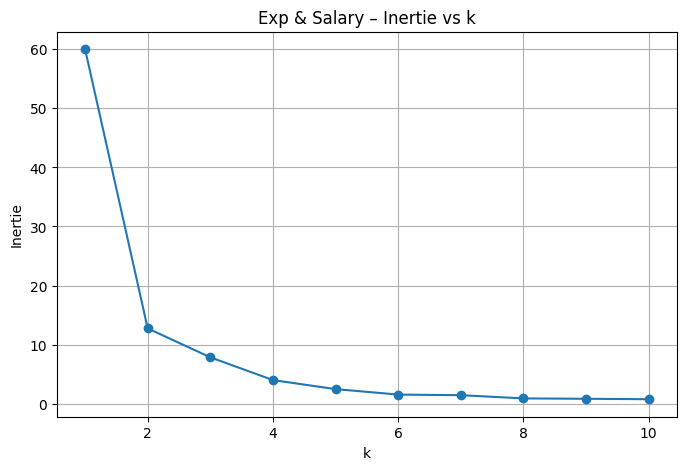

In [31]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 读取 CSV 文件中的薪资数据（包含经验和工资两个字段）
# 假设文件中列名为 'YearsExperience' 和 'Salary'
df = pd.read_csv("/content/sample_data/Salary_Data.csv")

# 2. 提取需要的特征列并删除缺失值（如果有）
X_salary = df[['YearsExperience', 'Salary']].dropna()

# 3. 对数据进行标准化处理（使不同量纲的数据具有相同的尺度）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_salary)

# 4. 定义一个函数：计算不同 k 值下的 KMeans 惯性值（Inertia）
def calculer_inerties(data, k_range):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# 5. 设置聚类数范围为 1 到 10
k_range = range(1, 11)

# 6. 计算每个 k 对应的惯性值
inertias = calculer_inerties(X_scaled, k_range)

# 7. 可视化：绘制 Inertie（总平方距离）与 k 值的关系图
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Exp & Salary – Inertie vs k")  # 标题
plt.xlabel("k")  # 横轴：聚类数
plt.ylabel("Inertie")  # 纵轴：惯性值
plt.grid(True)
plt.show()



# EX3

加载 IRIS 数据集

In [32]:
# 从 sklearn 中导入 iris 鸢尾花数据集加载函数
from sklearn.datasets import load_iris
# 导入 pandas 库用于数据处理
import pandas as pd
# 加载 iris 数据集，iris 是一个 Bunch 对象（类似字典）
iris = load_iris()
# 创建一个 DataFrame，使用 iris.data 作为数据，列名为 iris.feature_names
# iris.data 是一个 NumPy 数组，包含 150 个样本和 4 个特征（萼片长/宽、花瓣长/宽）
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# 将目标变量（数值标签：0, 1, 2）添加为新列 'target'
# 这些数字代表三种鸢尾花种类：setosa、versicolor、virginica
df_iris['target'] = iris.target
# 创建一个新的列 'target_name'，将数值标签映射为对应的类别名称字符串
# 使用 apply() 和 lambda 函数完成映射：如 0 ➝ setosa，1 ➝ versicolor，2 ➝ virginica
df_iris['target_name'] = df_iris['target'].apply(lambda x: iris.target_names[x])


显示并分析前几行数据

In [33]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


显示变量两两之间的散点图（带颜色）

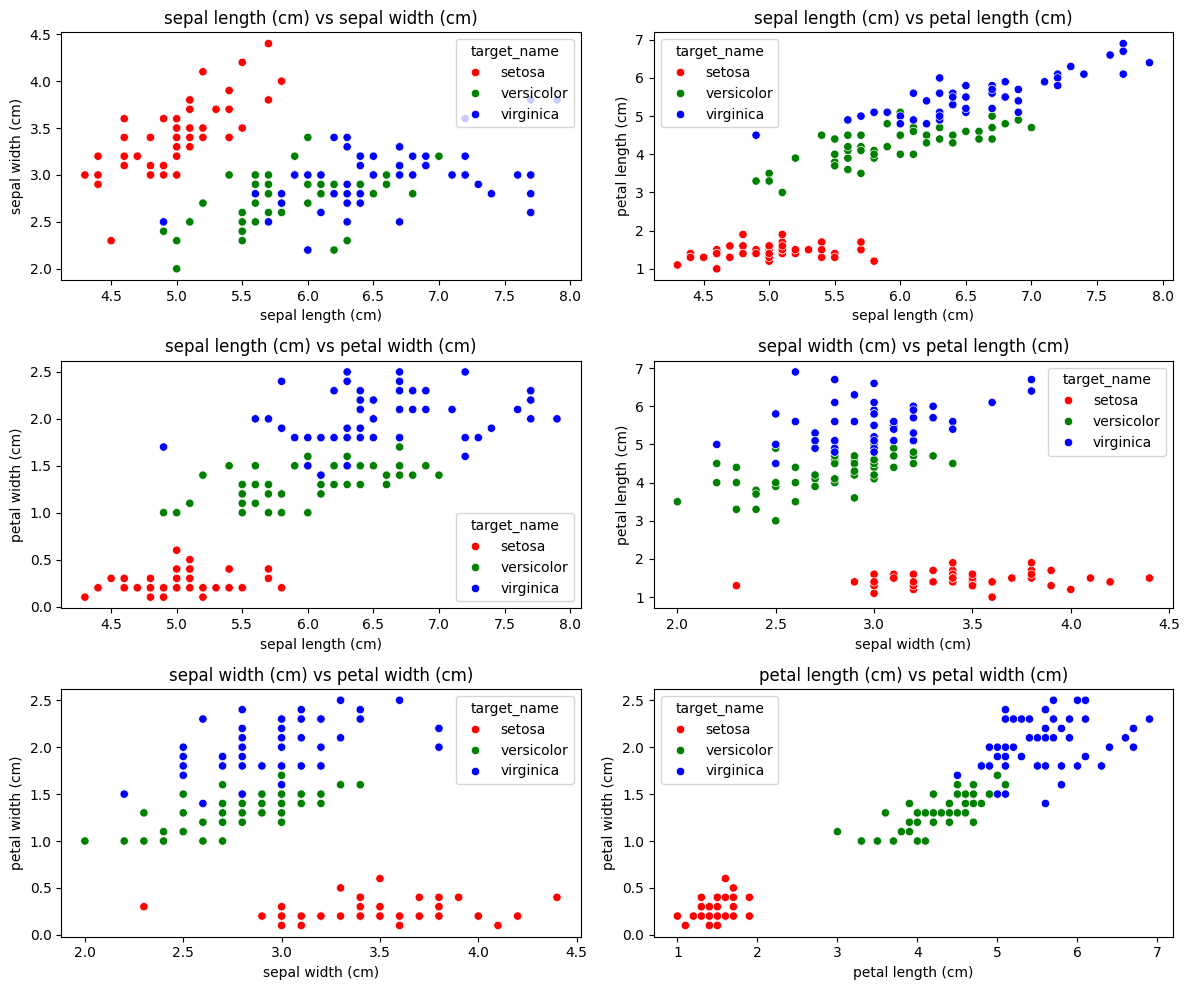

In [38]:
import seaborn as sns

# 创建一个图形窗口，设置整体尺寸为 12 英寸 × 10 英寸
plt.figure(figsize=(12, 10))

# subplot 编号初始化（每一个子图的位置编号，从1开始）
plot_idx = 1

features = df_iris.columns[:4]  # 只取4个数值特征
colors = ['red', 'green', 'blue']  # 每个类别一种颜色

# 外层循环：遍历所有特征的索引 i
for i in range(len(features)):
    # 内层循环：从 i+1 到最后，避免重复组合和自变量对自己作图
    for j in range(i + 1, len(features)):

        # 设置当前子图的布局位置，总共设置为 3 行 × 2 列，第 plot_idx 个图
        plt.subplot(3, 2, plot_idx)

        # 绘制特征 i 和特征 j 的散点图（二维特征组合）
        # hue='target_name'：根据目标类别名称为点上色（即setosa等）
        # data=df_iris：绘图数据来源于 DataFrame
        # palette=colors：颜色映射方案（colors 需预定义，如 ['red', 'green', 'blue']）
        sns.scatterplot(x=features[i], y=features[j], hue='target_name', data=df_iris, palette=colors)

        # 为每个子图添加标题，标明当前绘制的是哪两个特征的组合
        plt.title(f"{features[i]} vs {features[j]}")

        # 自动调整子图间距，避免标题或标签重叠
        plt.tight_layout()

        # 子图编号加 1，为下一个 subplot 做准备
        plot_idx += 1
# 显示所有子图
plt.show()

显示 pairplot
pairplot 展示了每对变量之间的关系，可以观察哪些组合更能区分花的类别。


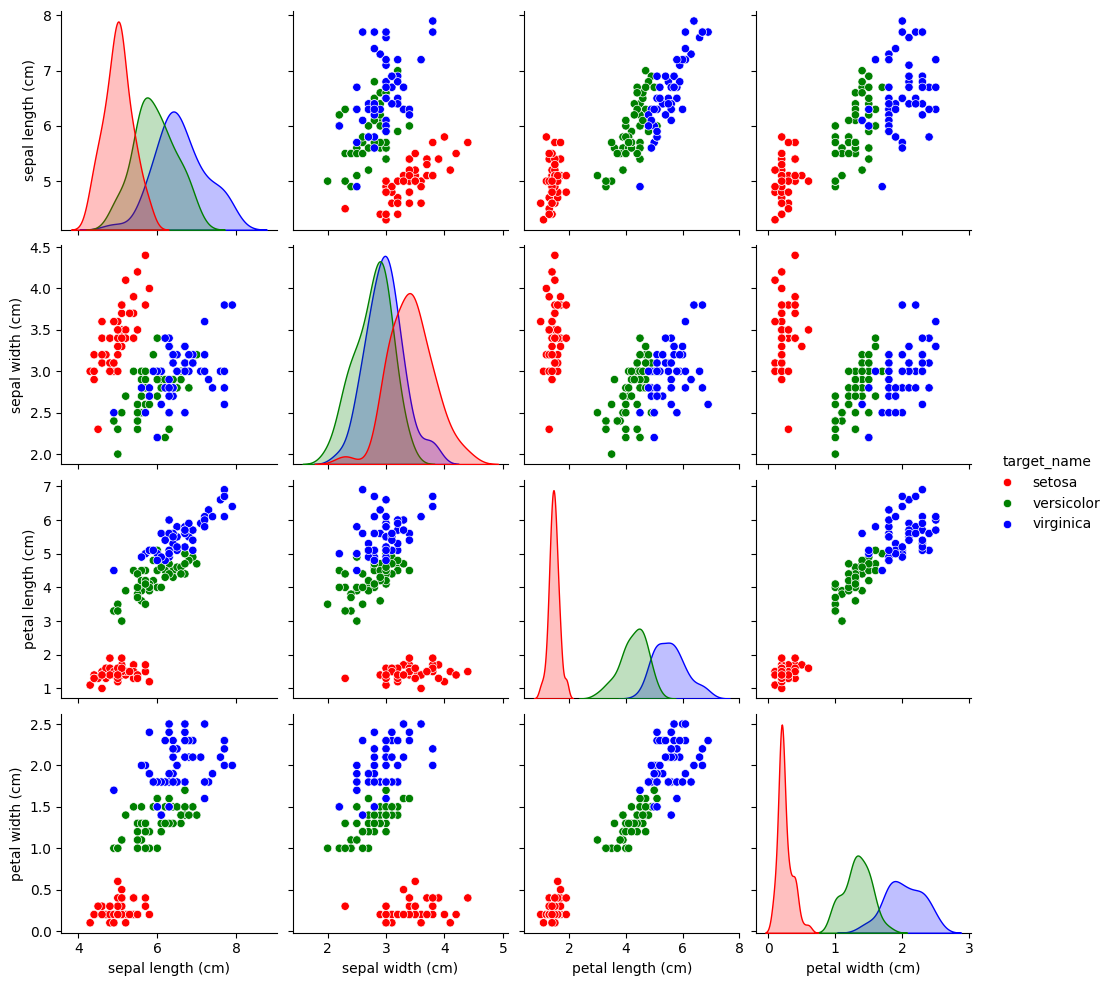

In [39]:
# 使用 seaborn 的 pairplot 画出多个特征之间的两两组合关系图（散点图 + 对角线直方图）
sns.pairplot(
    df_iris,                     # 输入的数据集（包含4个特征和类别名）
    vars=iris.feature_names,    # 只选择4个数值型特征参与组合（即萼片长/宽、花瓣长/宽）
    hue='target_name',          # 按照 'target_name'（花的类别名）来给不同点上色
    palette=colors              # 指定颜色映射，如 ['red', 'green', 'blue']
)

显示相关系数矩阵

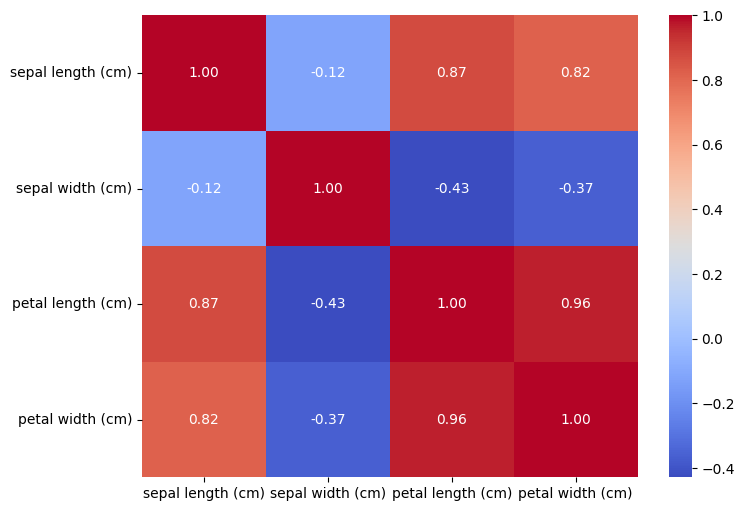

In [40]:
# 计算数值特征之间的皮尔逊相关系数矩阵
# 只选取 iris 的 4 个特征列（不包括目标列）
corr_matrix = df_iris[iris.feature_names].corr()


# 设置图像窗口大小为 8 x 6 英寸
plt.figure(figsize=(8, 6))
# 使用 seaborn 绘制热力图（heatmap）表示相关系数矩阵
sns.heatmap(
    corr_matrix,       # 相关矩阵作为输入
    annot=True,        # 在格子中显示具体数值
    cmap='coolwarm',   # 设置颜色风格（红蓝渐变）
    fmt=".2f"          # 显示为小数点后 2 位
)

plt.show()

应用 PCA 将维度降到 2 维

In [41]:
# 导入必要的库
from sklearn.decomposition import PCA                    # 用于主成分分析（降维）
from sklearn.preprocessing import StandardScaler         # 用于数据标准化
import pandas as pd

# 对 Iris 的四个数值特征列进行标准化处理
# 标准化可以消除量纲影响，使每个特征均值为0、标准差为1
X_scaled = StandardScaler().fit_transform(df_iris[iris.feature_names])

# 创建 PCA 模型，指定降维到 2 维主成分
pca = PCA(n_components=2)

# 使用 PCA 模型对标准化后的数据进行拟合与转换
# 得到每个样本在两个主成分方向上的投影坐标（即降维后的新特征）
X_pca = pca.fit_transform(X_scaled)

# 将降维后的结果转换为 DataFrame，命名列为 PC1 和 PC2（主成分1和2）
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 添加目标分类名称列，便于可视化时按类别分色
df_pca['target_name'] = df_iris['target_name']



显示 PCA 降维结果

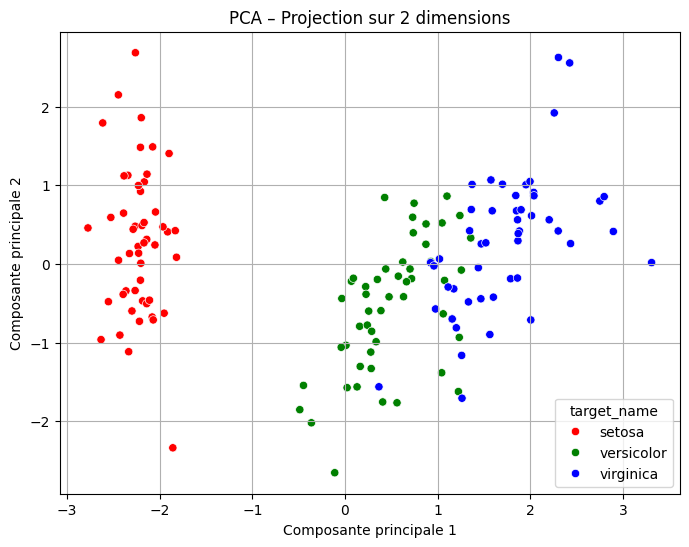

In [43]:
# 创建一个图像窗口，设置尺寸为 8 x 6 英寸
plt.figure(figsize=(8, 6))

# 使用 seaborn 绘制二维散点图
# x='PC1'，y='PC2'：表示两个主成分坐标轴
# hue='target_name'：根据花的类别（setosa、versicolor、virginica）着色
# data=df_pca：使用我们刚才降维并合并好类别标签的数据集
# palette=colors：使用自定义颜色列表（如 ['red', 'green', 'blue']）
colors = ['red', 'green', 'blue']

sns.scatterplot(x='PC1', y='PC2', hue='target_name', data=df_pca, palette=colors)

# 添加图表标题
plt.title("PCA – Projection sur 2 dimensions")  # 法语：PCA——二维投影

# 设置 x 和 y 轴标签为主成分名称
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")

# 显示网格线，便于观察分布结构
plt.grid(True)

# 显示图像
plt.show()



# EX4

分析：wine 数据集包含 13 个化学特征（如酒精、镁、色调等）与 3 种葡萄酒类型的标签。

In [44]:
# 导入所需库
from sklearn.datasets import load_wine
import pandas as pd

# 加载 wine 数据集（包含 13 个化学特征和 3 个类型的葡萄酒）
wine = load_wine()

# 创建 DataFrame，列名使用特征名
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# 添加目标分类（数值标签：0、1、2）
df_wine['target'] = wine.target

# 添加目标分类名称（字符串标签：例如 class_0, class_1, class_2）
df_wine['target_name'] = df_wine['target'].apply(lambda x: wine.target_names[x])

# 打印前 5 行数据（数据预览）
print(df_wine.head())

# 打印每种葡萄酒类别的样本数量（分布统计）
print(df_wine['target_name'].value_counts())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target target_name  

Afficher le pairplot

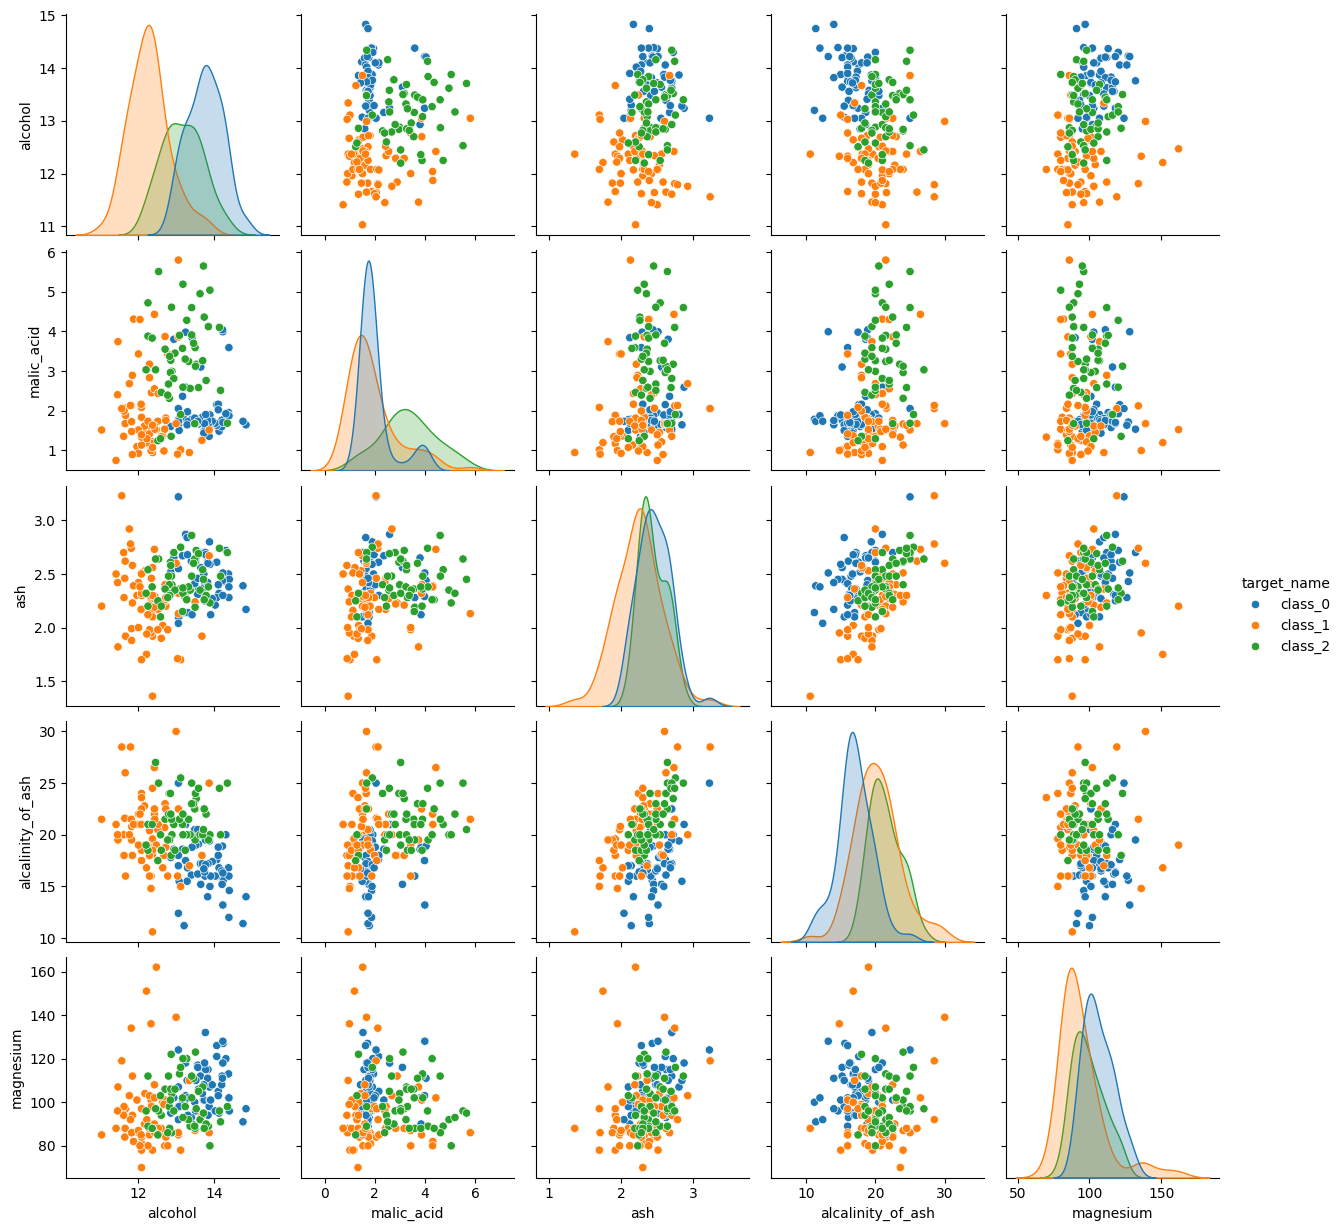

In [46]:
# 导入 seaborn 可视化库
import seaborn as sns

# 使用 pairplot 对特征之间的两两组合关系绘图，并根据类别着色
sns.pairplot(
    df_wine.iloc[:, :5].join(df_wine['target_name']),  # 选择前5列特征 + 类别名列作为绘图数据
    hue='target_name',                                 # 按照 'target_name'（分类名）给不同类别上色
    diag_kind='kde'                                    # 对角线图用 KDE 曲线代替直方图（更平滑）
)


3. Afficher la matrice de corrélation

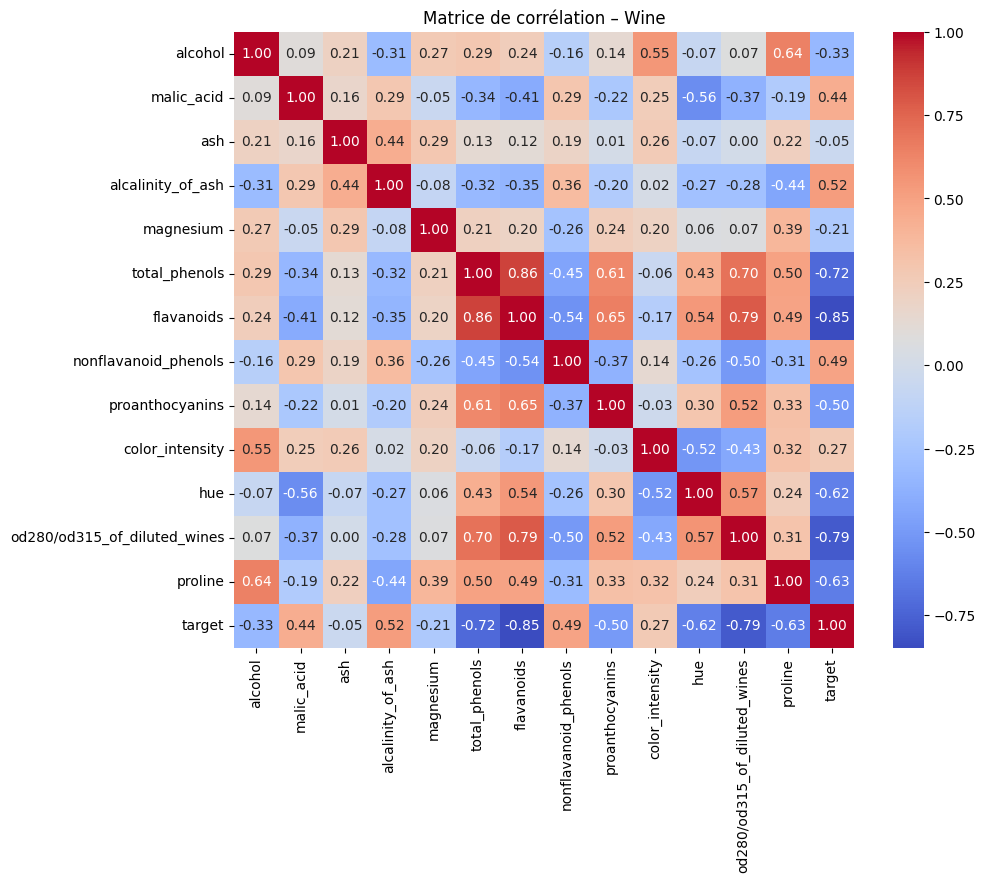

In [48]:
# 导入 matplotlib 的绘图库
import matplotlib.pyplot as plt

# 创建一个图形窗口，尺寸为 10 x 8 英寸
plt.figure(figsize=(10, 8))

# 使用 seaborn 画出热力图，显示数值型特征之间的皮尔逊相关系数矩阵
sns.heatmap(
    df_wine.corr(numeric_only=True),  # 计算所有数值型列之间的相关系数
    annot=True,                       # 在每个格子中显示数值
    cmap="coolwarm",                  # 使用红蓝渐变色表示相关性强弱
    fmt=".2f"                         # 格子中的数字保留 2 位小数
)

# 添加图表标题
plt.title("Matrice de corrélation – Wine")  # 法语：葡萄酒数据的相关性矩阵

# 显示图像
plt.show()

 4. Appliquer une PCA à 2 dimensions

In [49]:
# 导入必要的库
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 对除去最后两列（target 和 target_name）的数值特征进行标准化
X_scaled = StandardScaler().fit_transform(df_wine.iloc[:, :-2])
# 或者更清晰地写：
# X_scaled = StandardScaler().fit_transform(df_wine[wine.feature_names])

# 创建 PCA 模型，指定降维到 2 个主成分
pca = PCA(n_components=2)

# 对标准化后的数据进行 PCA 降维
X_pca = pca.fit_transform(X_scaled)

# 将 PCA 结果转换为 DataFrame，列名为 PC1 和 PC2
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 添加类别名称列（用于绘图着色）
df_pca['target_name'] = df_wine['target_name']


5. Afficher le résultat de la PCA

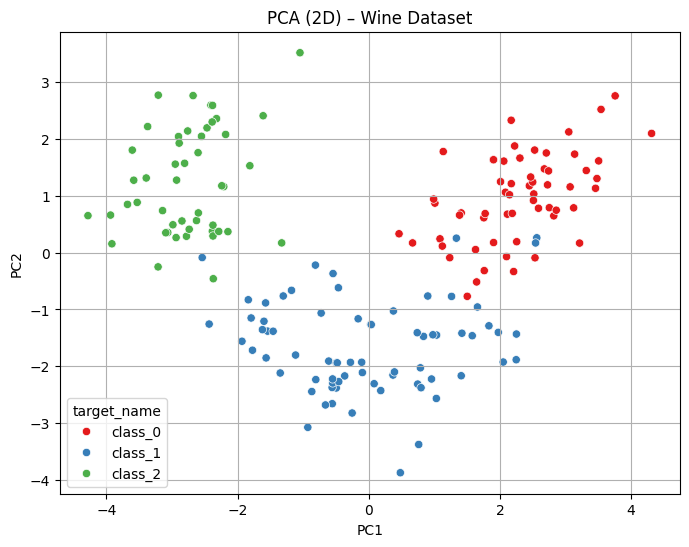

In [51]:
# 创建一个图像窗口，大小设置为 8x6 英寸
plt.figure(figsize=(8, 6))
# 使用 seaborn 绘制二维散点图，展示 PCA 降维后的数据分布
sns.scatterplot(
    data=df_pca,                # 使用之前降维后的数据 DataFrame
    x='PC1',                    # 横轴：主成分 1（第1个 PCA 分量）
    y='PC2',                    # 纵轴：主成分 2（第2个 PCA 分量）
    hue='target_name',          # 根据葡萄酒的类别名上色（class_0, class_1, class_2）
    palette='Set1'              # 使用 seaborn 预定义的调色板（Set1颜色鲜明，适合分类）
)
# 设置图表标题
plt.title("PCA (2D) – Wine Dataset")  # PCA二维可视化，适用于分类或聚类观察
# 添加网格线，便于观察分布结构
plt.grid(True)
# 显示图像
plt.show()

6. Appliquer t-SNE avec différentes perplexités

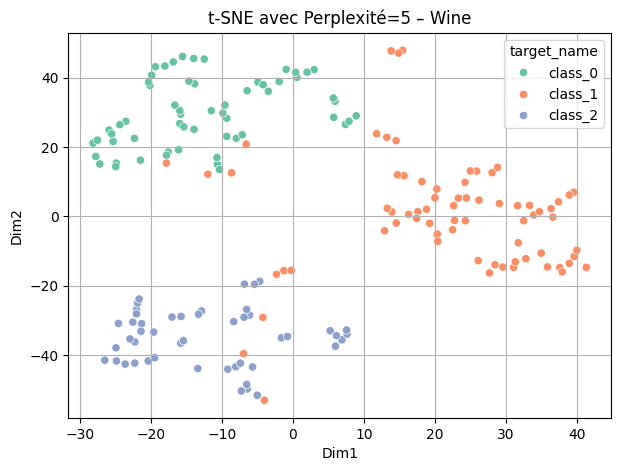

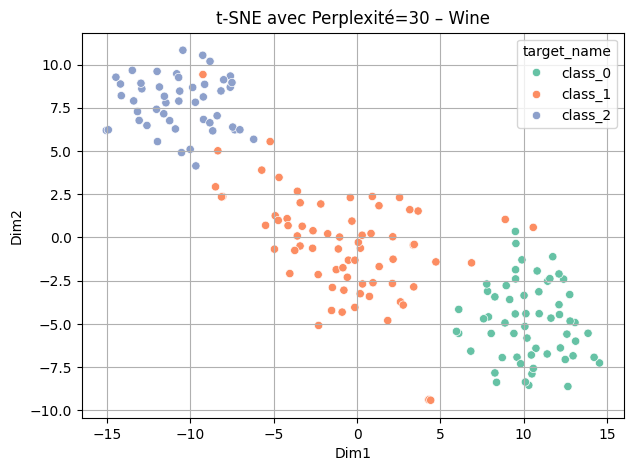

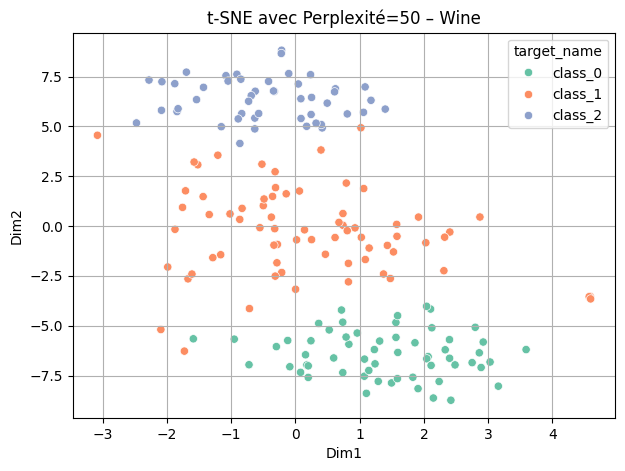

In [52]:
# 导入必要的库
from sklearn.manifold import TSNE              # 导入 t-SNE 算法（非线性降维）
from sklearn.preprocessing import StandardScaler  # 导入标准化工具
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 t-SNE 的 perplexity 参数列表，用于测试多种局部邻域范围
perplexities = [5, 30, 50]

# 对数值特征进行标准化（去除 target 和 target_name 列）
X_scaled_wine = StandardScaler().fit_transform(df_wine.iloc[:, :-2])

# 遍历每个 perplexity 值，分别进行 t-SNE 降维和可视化
for perp in perplexities:
    # 创建 t-SNE 模型对象，指定降维到2维，设置当前 perplexity 和随机种子
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)

    # 对标准化数据进行拟合并降维，得到二维投影结果
    X_tsne = tsne.fit_transform(X_scaled_wine)

    # 将降维结果转为 DataFrame，命名为 Dim1 和 Dim2，方便绘图
    df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])

    # 添加原始分类名称列，用于颜色标注（分类标签）
    df_tsne['target_name'] = df_wine['target_name']

    # 创建图形窗口，设置大小为 7x5 英寸
    plt.figure(figsize=(7, 5))

    # 使用 seaborn 绘制二维散点图，根据类别着色
    sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='target_name', palette='Set2')

    # 设置标题，显示当前的 perplexity 值
    plt.title(f"t-SNE avec Perplexité={perp} – Wine")

    # 显示网格线，辅助观察结构
    plt.grid(True)

    # 显示图形
    plt.show()

7. Afficher le résultat de la t-SNE + Analyse
📌 分析：
Perplexité 5：聚类很紧，但可能过度局部化。

Perplexité 30：效果最平衡，3 类分布自然，间隔较清晰。

Perplexité 50：较大 perplexité 增强了全局结构，可能导致部分聚类融合。

🎯 结论：
t-SNE 是强大的非线性降维算法，尤其适合在复杂、非线性数据中揭示隐藏类别结构。但结果依赖于参数，且不能解释全局关系。

8. Tester l’algorithme UMAP sur le dataset wine

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


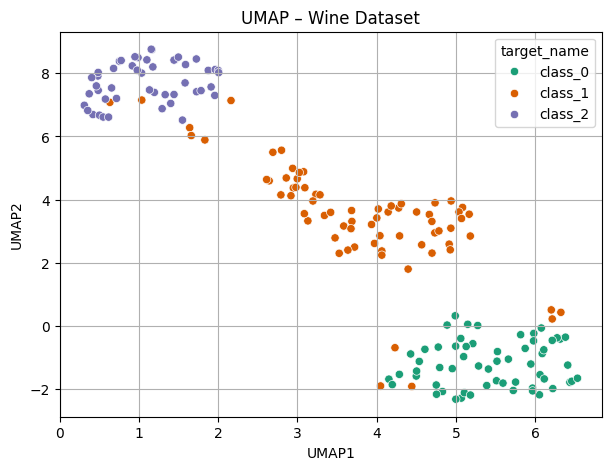

In [53]:
# 导入 UMAP 库（确保已安装 umap-learn，例如：pip install umap-learn）
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建 UMAP 模型，设置降维到 2 维，随机种子为 42 保证可复现性
umap_model = umap.UMAP(n_components=2, random_state=42)

# 使用 UMAP 对标准化后的葡萄酒特征数据进行降维处理
X_umap = umap_model.fit_transform(X_scaled_wine)

# 将降维后的结果转为 Pandas DataFrame，命名为 'UMAP1' 和 'UMAP2'
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

# 添加原始分类名称列，方便用于散点图着色
df_umap['target_name'] = df_wine['target_name']

# 创建图形窗口，大小为 7x5 英寸
plt.figure(figsize=(7, 5))

# 使用 seaborn 绘制 UMAP 的二维降维结果图，按类别着色
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='target_name', palette='Dark2')

# 设置图表标题
plt.title("UMAP – Wine Dataset")

# 显示网格线，辅助观察点的分布结构
plt.grid(True)

# 展示图像
plt.show()


Question 9：重新完成 1 到 6 步

# EX5 其他聚类方法

第 1 步：使用 make_classification 生成人工数据集



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas

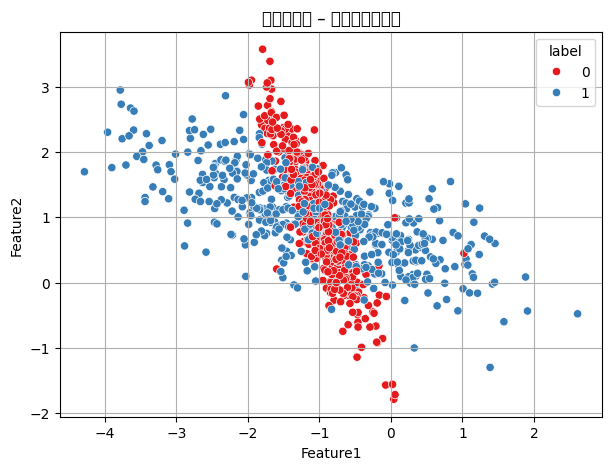

In [54]:
# 导入必要的库
from sklearn.datasets import make_classification       # 用于生成可控的分类数据
import pandas as pd                                     # 用于数据结构处理
import matplotlib.pyplot as plt                         # 用于绘图
import seaborn as sns                                   # 用于增强型可视化


# 生成一个二分类的数据集，总共1000个样本，每个样本3个特征
X, y = make_classification(
    n_samples=1000,           # 总共生成 1000 条样本数据
    n_features=3,             # 每个样本有 3 个数值特征
    n_redundant=0,            # 不包含冗余特征
    n_informative=3,          # 所有特征都是有区分度的信息特征
    n_clusters_per_class=1,   # 每个类别只有一个聚类簇（更适合可视化）
    n_classes=2,              # 分为两个类别（label = 0 和 1）
    random_state=42           # 固定随机种子，确保每次生成的数据一致
)


# 将生成的特征数据 X 和标签 y 组合成 Pandas 的 DataFrame，便于后续处理
df_classif = pd.DataFrame(X, columns=["Feature1", "Feature2", "Feature3"])
df_classif["label"] = y  # 添加标签列（0 或 1）


# 创建图像窗口，设置尺寸为 7x5 英寸
plt.figure(figsize=(7, 5))

# 可视化两个特征（Feature1 与 Feature2），并用不同颜色区分类别
sns.scatterplot(
    data=df_classif,
    x="Feature1", y="Feature2",
    hue="label",                  # 使用标签区分颜色
    palette="Set1"                # 使用 seaborn 的预设调色板 Set1
)

# 设置图表标题和网格
plt.title("人工数据集 – 两类、三个特征")
plt.grid(True)

# 显示图像
plt.show()


 第 2.a 步：使用 KMeans 聚类



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


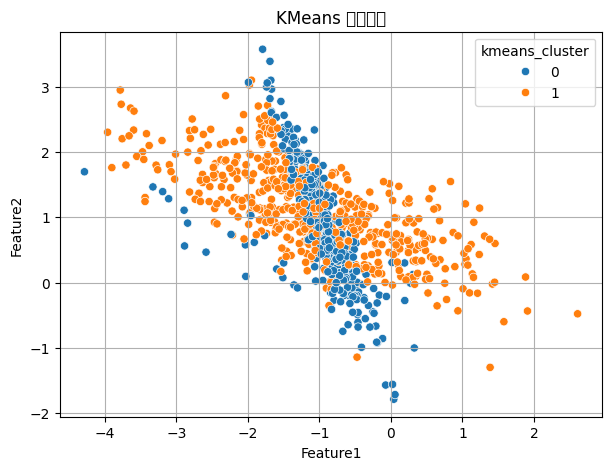

In [55]:
# 导入 KMeans 聚类算法
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 创建 KMeans 模型，设定聚类数量为 2
kmeans = KMeans(n_clusters=2, random_state=42)

# 对样本的3个特征列进行聚类，并将结果作为新列加入 DataFrame
df_classif["kmeans_cluster"] = kmeans.fit_predict(df_classif[["Feature1", "Feature2", "Feature3"]])
# fit_predict：拟合模型并返回每个样本所属的簇编号（0或1）


# 创建图形窗口，设置大小为 7x5 英寸
plt.figure(figsize=(7, 5))

# 使用 seaborn 绘制散点图，展示聚类结果在 Feature1 与 Feature2 空间中的分布
sns.scatterplot(
    data=df_classif,
    x="Feature1", y="Feature2",            # 只取前两个特征作图
    hue="kmeans_cluster",                  # 按照聚类结果着色（0或1）
    palette="tab10"                        # 使用 matplotlib 的 tab10 调色板
)

# 设置图标题和网格线
plt.title("KMeans 聚类结果")
plt.grid(True)

# 显示图像
plt.show()



 想进一步比较聚类与真实标签的对应关系？

In [56]:
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(df_classif["label"], df_classif["kmeans_cluster"])
print(f"ARI（调整兰德指数）：{score:.2f}")

ARI（调整兰德指数）：0.57


第 2.b 步：使用 DBSCAN 密度聚类

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


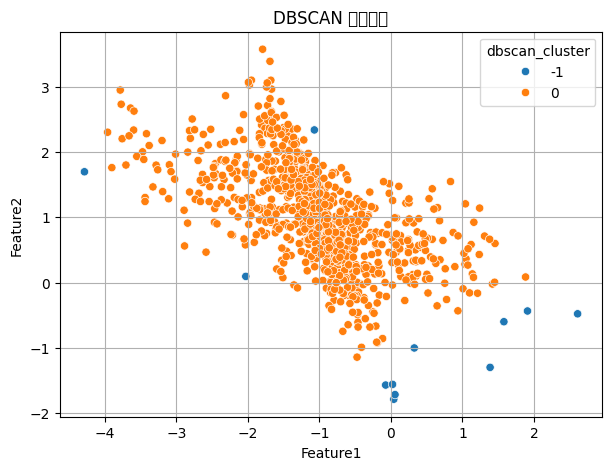

In [58]:
# 导入 DBSCAN 聚类算法和数据标准化工具
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 对特征数据进行标准化（DBSCAN 对距离非常敏感，必须标准化）
X_scaled = StandardScaler().fit_transform(df_classif[["Feature1", "Feature2", "Feature3"]])

# 创建 DBSCAN 模型，设置邻域半径 eps 和最小核心点数 min_samples
# eps=0.7 控制聚类“半径”，min_samples=5 表示每个簇至少需要5个点
dbscan = DBSCAN(eps=0.7, min_samples=5)

# 对标准化后的数据进行聚类，并将结果添加为新列
# -1 表示被判定为噪声（noise/outlier）的点
df_classif["dbscan_cluster"] = dbscan.fit_predict(X_scaled)

# 创建图形窗口，设置大小为 7x5 英寸
plt.figure(figsize=(7, 5))

# 可视化 DBSCAN 聚类结果（使用前两个特征）
sns.scatterplot(
    data=df_classif,
    x="Feature1", y="Feature2",              # 横纵坐标为前两个特征
    hue="dbscan_cluster",                    # 用不同颜色表示不同簇（-1 为噪声点）
    palette="tab10"                          # 调色板
)

# 设置图表标题和网格
plt.title("DBSCAN 聚类结果")
plt.grid(True)

# 显示图像
plt.show()

第 2.c 步：使用 GMM（高斯混合模型）聚类

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas

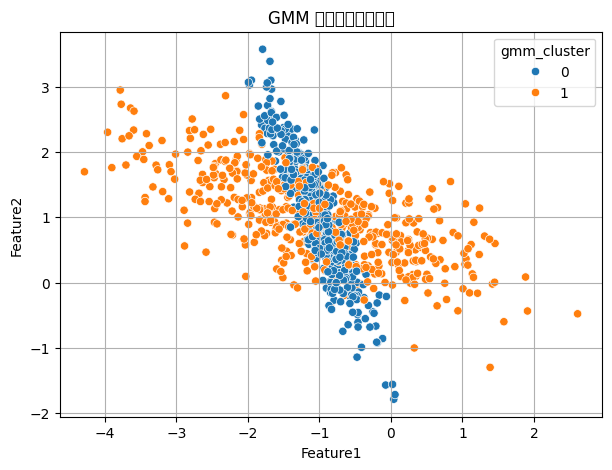

In [59]:
# 导入 GMM 聚类模型（基于高斯分布的聚类）
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# 创建 GMM 模型，设定聚类数为 2（即使用两个高斯分布）
gmm = GaussianMixture(n_components=2, random_state=42)

# 使用 GMM 模型对三维特征数据进行拟合和预测，将聚类标签保存为新列
df_classif["gmm_cluster"] = gmm.fit_predict(df_classif[["Feature1", "Feature2", "Feature3"]])
# GMM 聚类可以看作是软聚类：每个样本属于每个簇的概率都被估计，但这里只取最大概率所属簇

# 创建图形窗口，设置大小为 7x5 英寸
plt.figure(figsize=(7, 5))

# 可视化 GMM 聚类结果：只投影在 Feature1 和 Feature2 平面上
sns.scatterplot(
    data=df_classif,
    x="Feature1", y="Feature2",              # 横轴与纵轴选择前两个特征
    hue="gmm_cluster",                       # 按照 GMM 聚类标签上色
    palette="tab10"                          # 调色板
)

# 设置标题和网格线
plt.title("GMM 高斯混合聚类结果")
plt.grid(True)

# 显示图形
plt.show()


# EX6

第 1 步：加载 MNIST 数据集

In [61]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# 加载手写数字（MNIST 精简版：8x8 图像）
digits = load_digits()
X = digits.data  # 形状：(1797, 64)
images = digits.images


第 2 步：显示部分原始图像

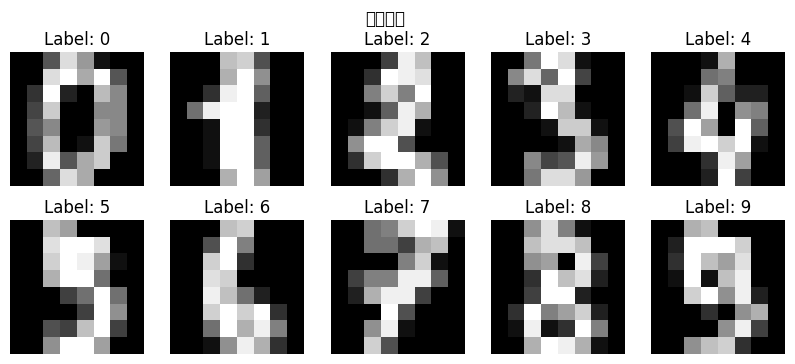

In [64]:
# 创建图形窗口，整体尺寸为 10x4 英寸，准备显示多个子图
plt.figure(figsize=(10, 4))

# 遍历前 10 张图像
for i in range(10):
    # 创建 2 行 5 列的子图，当前是第 i+1 个
    plt.subplot(2, 5, i + 1)

    # 显示图像（8x8 像素灰度图），颜色映射为灰度
    plt.imshow(images[i], cmap='gray')

    # 设置每个图像的标题，显示对应的数字标签
    plt.title(f"Label: {digits.target[i]}")

    # 关闭坐标轴显示（更清爽）
    plt.axis('off')

# 设置整个图像的总标题
plt.suptitle("原始图像")

# 显示图像窗口
plt.show()

第 3 步：添加高斯噪声到每个像素，并可视化



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22768 (\N{CJK UNIFIED IDEOGRAPH-58F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28155 (\N{CJK UNIFIED IDEOGRAPH-6DFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  fig.canvas

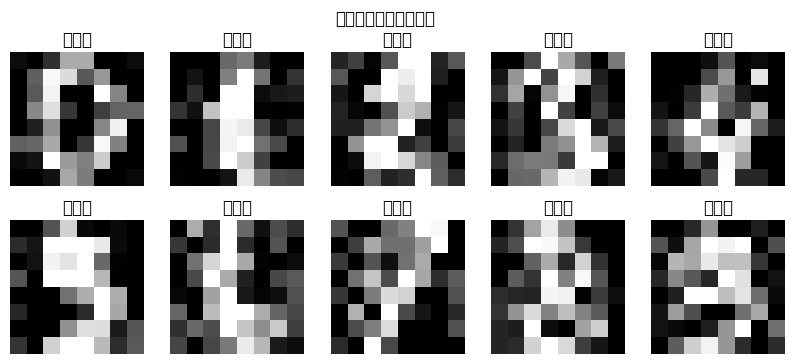

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 添加高斯噪声
# loc=0 表示均值为 0，scale=4 表示标准差为 4，size=X.shape 保证噪声与原数据维度相同
noise = np.random.normal(loc=0, scale=4, size=X.shape)

# 将噪声加到原始图像数据 X 上（注意 X 是 digits.data，每行64维像素）
X_noisy = X + noise

# 将添加噪声后的像素值限制在有效范围 [0, 16]（因为 digits 数据集中像素值 ∈ [0,16]）
X_noisy = np.clip(X_noisy, 0, 16)


# 显示添加噪声后的前 10 张图像
plt.figure(figsize=(10, 4))  # 创建图像窗口，大小 10x4 英寸

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 创建 2 行 5 列的子图

    # 将 1×64 的向量 reshape 成 8×8 的图像
    plt.imshow(X_noisy[i].reshape(8, 8), cmap='gray')  # 使用灰度图显示

    plt.title("带噪声")     # 设置子图标题
    plt.axis('off')         # 不显示坐标轴

# 设置整页标题
plt.suptitle("添加高斯噪声后的图像")

# 显示图像
plt.show()

第 4 步：使用 PCA 进行去噪处理，并比较不同降维维度



<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 21435 (\N{CJK UNIFIED IDEOGRAPH-53BB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-67-3249dd13037e>:33: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from

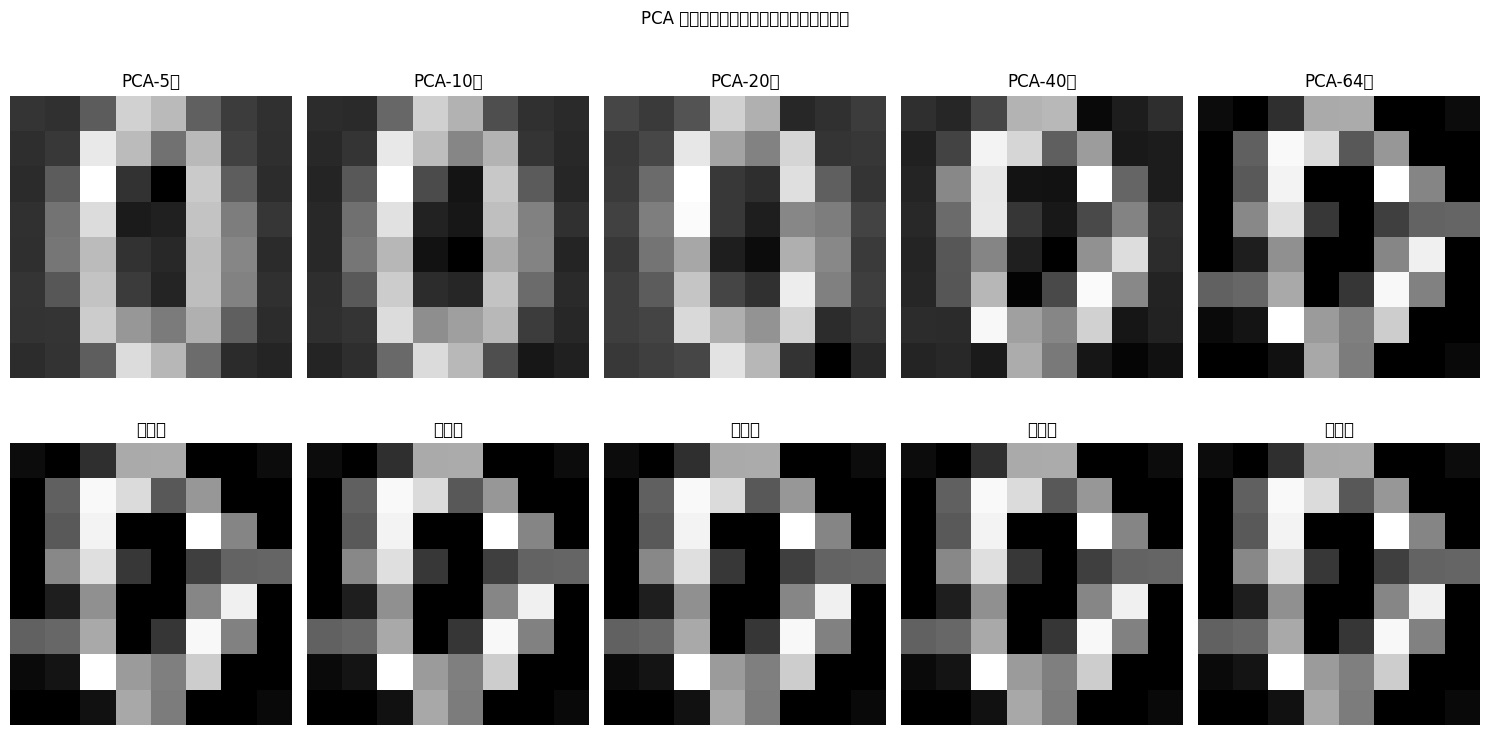

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 定义要测试的降维维度（主成分数量）
dimensions = [5, 10, 20, 40, 64]  # 从低到高维，64 表示不降维（原始维度）

# 创建图像窗口，设置整体尺寸
plt.figure(figsize=(15, 8))

# 遍历每个降维维度
for idx, n_comp in enumerate(dimensions):
    # 创建并训练 PCA 模型，保留 n_comp 个主成分
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_noisy)              # 对带噪图像进行降维
    X_reconstructed = pca.inverse_transform(X_pca)  # 重建图像（升维回原始维度）

    # 上排图：显示重建后的图像（去噪结果）
    plt.subplot(2, len(dimensions), idx + 1)
    plt.imshow(X_reconstructed[0].reshape(8, 8), cmap='gray')  # 显示重建图像（第1张）
    plt.title(f"PCA-{n_comp}维")  # 设置子图标题
    plt.axis('off')               # 隐藏坐标轴

    # 下排图：显示原始带噪图像（同一张）
    plt.subplot(2, len(dimensions), len(dimensions) + idx + 1)
    plt.imshow(X_noisy[0].reshape(8, 8), cmap='gray')  # 显示带噪图像
    plt.title("带噪图")                                # 设置统一标题
    plt.axis('off')                                     # 隐藏坐标轴

# 设置整张图的大标题
plt.suptitle("PCA 去噪效果（上：重建图，下：带噪图）")

# 自动调整子图间距
plt.tight_layout()

# 显示图像
plt.show()